In [120]:
# Install Dependencies
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install statsmodels
%pip install itertools
%pip install scipy
%pip install scikit-learn

# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as itools        
import statsmodels.api as sm 
from scipy.stats import shapiro 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from statsmodels.stats.stattools import durbin_watson



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfie

In [121]:
# Read in our data
cleanData = pd.read_csv("clean_dataset.csv")

# Scale the "Credit Score" column back to its original values and cast to int
cleanData['CreditScore'] = cleanData['CreditScore'].apply(
    lambda x: round(x * (850 - 300) / (67 - 0) + 300)
).astype(int)

# Scale the "Debt" column back to its original values
cleanData['Debt'] = (cleanData['Debt'] * 1000)

# Cast the "Age" column to integers
cleanData['Age'] = cleanData['Age'].astype(int)

# Print Raw Data
print(cleanData)

     Gender  Age     Debt  Married  BankCustomer         Industry Ethnicity  \
0         1   30      0.0        1             1      Industrials     White   
1         0   58   4460.0        1             1        Materials     Black   
2         0   24    500.0        1             1        Materials     Black   
3         1   27   1540.0        1             1      Industrials     White   
4         1   20   5625.0        1             1      Industrials     White   
..      ...  ...      ...      ...           ...              ...       ...   
685       1   21  10085.0        0             0        Education     Black   
686       0   22    750.0        1             1           Energy     White   
687       0   25  13500.0        0             0       Healthcare    Latino   
688       1   17    205.0        1             1  ConsumerStaples     White   
689       1   35   3375.0        1             1           Energy     Black   

     YearsEmployed  PriorDefault  Employed  CreditS

In [122]:
# Find typical values for each variable
print(cleanData.describe())

           Gender         Age          Debt     Married  BankCustomer  \
count  690.000000  690.000000    690.000000  690.000000    690.000000   
mean     0.695652   31.066667   4758.724638    0.760870      0.763768   
std      0.460464   11.859906   4978.163249    0.426862      0.425074   
min      0.000000   13.000000      0.000000    0.000000      0.000000   
25%      0.000000   22.000000   1000.000000    1.000000      1.000000   
50%      1.000000   28.000000   2750.000000    1.000000      1.000000   
75%      1.000000   37.000000   7207.500000    1.000000      1.000000   
max      1.000000   80.000000  28000.000000    1.000000      1.000000   

       YearsEmployed  PriorDefault    Employed  CreditScore  DriversLicense  \
count     690.000000    690.000000  690.000000   690.000000      690.000000   
mean        2.223406      0.523188    0.427536   319.653623        0.457971   
std         3.346513      0.499824    0.495080    39.913590        0.498592   
min         0.000000      

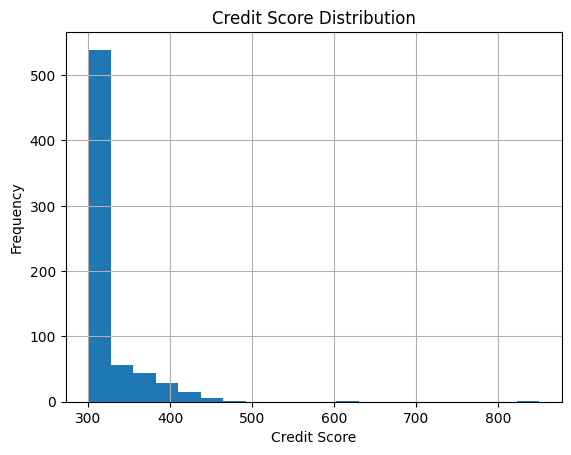

In [123]:
# Histogram for Credit Score
cleanData['CreditScore'].hist(bins=20)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

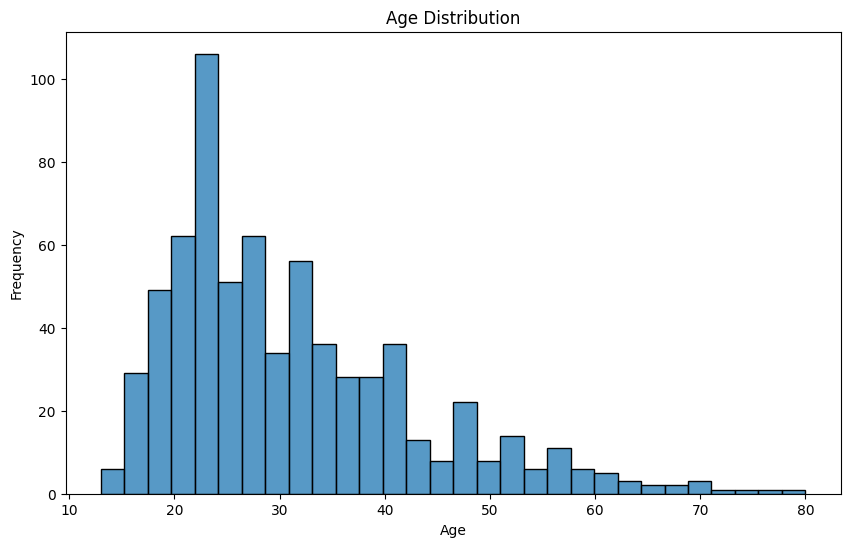

In [124]:
# Histogram for Age distribution
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(data=cleanData, x='Age', bins=30)
hist_plot.set_title('Age Distribution')
hist_plot.set_xlabel('Age')
hist_plot.set_ylabel('Frequency')

plt.show()

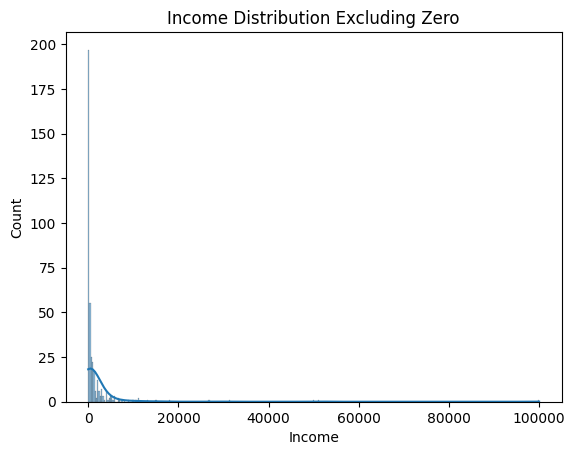

In [125]:
# Filtering out the zero income values
non_zero_income = cleanData[cleanData['Income'] != 0]['Income']

# Histogram for distribution
sns.histplot(non_zero_income, kde=True)
plt.title('Income Distribution Excluding Zero')
plt.show()

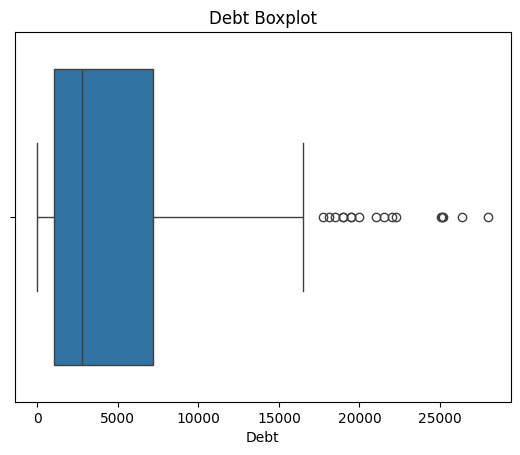

In [126]:
# Bloxplot for Debt
sns.boxplot(x=cleanData['Debt'])
plt.title('Debt Boxplot')
plt.show()

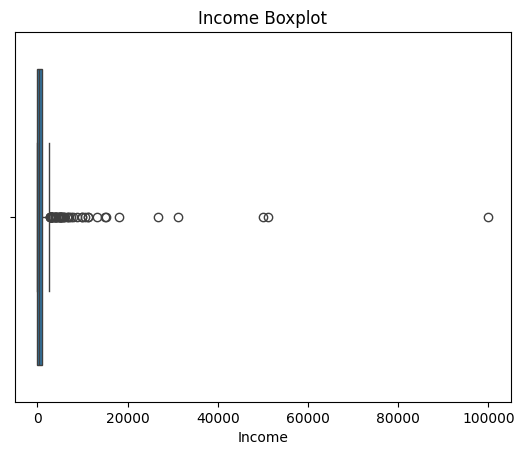

In [127]:
# Boxplot for Income
sns.boxplot(x=non_zero_income)
plt.title('Income Boxplot')
plt.show()

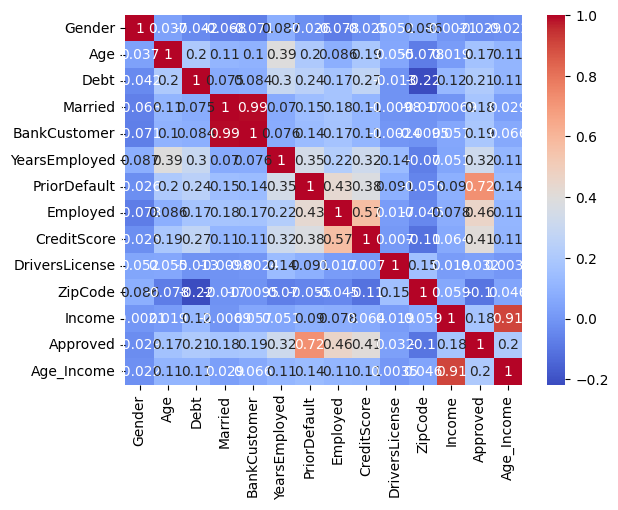

         Variables         VIF
0           Gender    3.367562
1              Age    9.503809
2             Debt    2.370290
3          Married  474.530276
4     BankCustomer  478.933977
5    YearsEmployed    2.022776
6     PriorDefault    4.817995
7         Employed    2.532267
8      CreditScore   16.562925
9   DriversLicense    1.948655
10         ZipCode    2.243648
11          Income    9.886526
12        Approved    4.232413
13      Age_Income    8.188743


In [128]:
# Numeric columns from the DataFrame
numeric_df = cleanData.select_dtypes(include='number')

# Create an interaction term between 'Age' and 'Income'
numeric_df['Age_Income'] = numeric_df['Age'] * numeric_df['Income']

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

# VIF
VIF = pd.DataFrame()
VIF["Variables"] = numeric_df.columns
VIF["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

print(VIF)


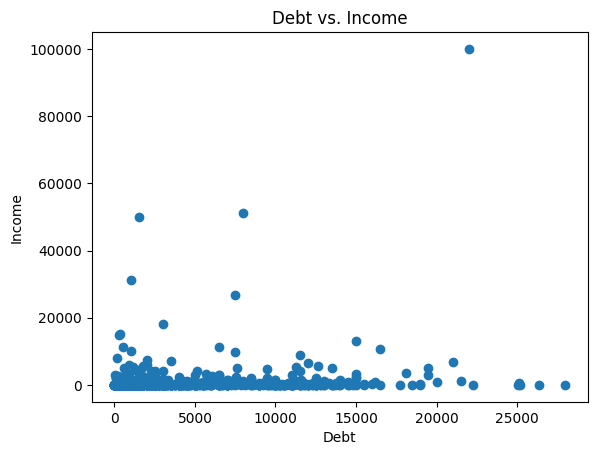

In [129]:
# Scatter plot for Debt and Income
plt.scatter(cleanData['Debt'], cleanData['Income'])
plt.title('Debt vs. Income')
plt.xlabel('Debt')
plt.ylabel('Income')
plt.show()

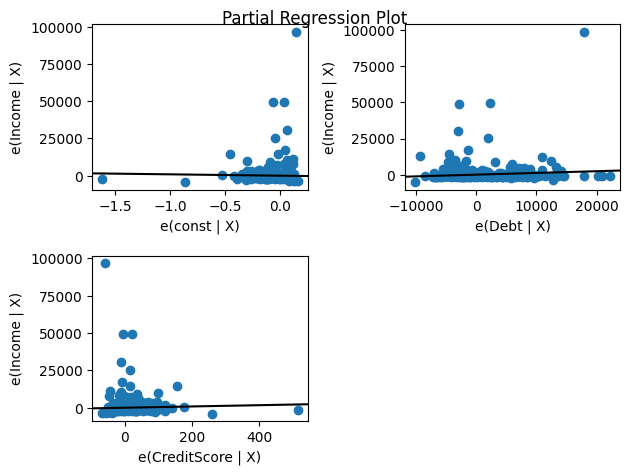

In [130]:
# Income and Debt while controlling for CreditScore
fig = sm.graphics.plot_partregress_grid(
    sm.OLS(cleanData['Income'], sm.add_constant(cleanData[['Debt', 'CreditScore']])).fit()
)
plt.show()

/var/folders/wf/szdy9b493w9fmdg8p85hqfrc0000gn/T/ipykernel_60957/1450650696.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(['Female', 'Male'])


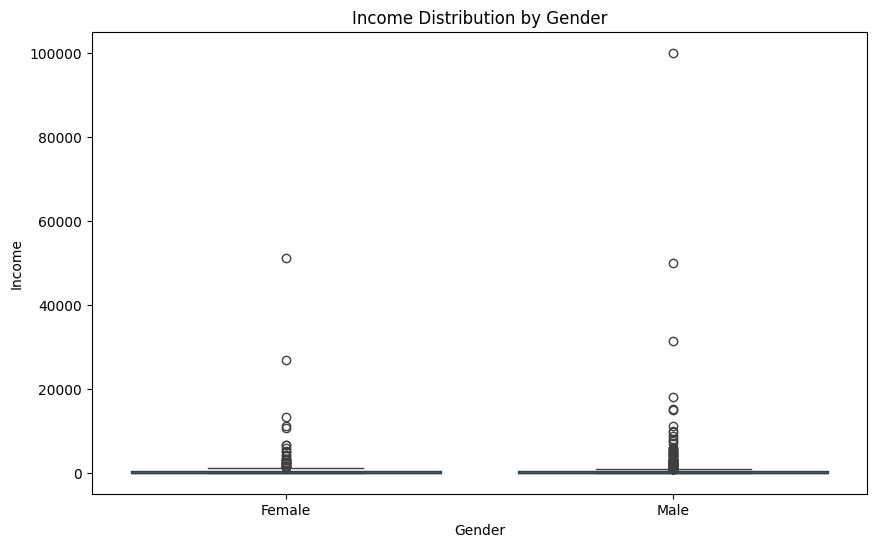

In [131]:
# Create a boxplot of Income by Gender
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Gender', y='Income', data=cleanData)
boxplot.set_title('Income Distribution by Gender')
boxplot.set_xlabel('Gender')
boxplot.set_ylabel('Income')
boxplot.set_xticklabels(['Female', 'Male'])

plt.show()

/var/folders/wf/szdy9b493w9fmdg8p85hqfrc0000gn/T/ipykernel_60957/640962148.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(['Female', 'Male'])


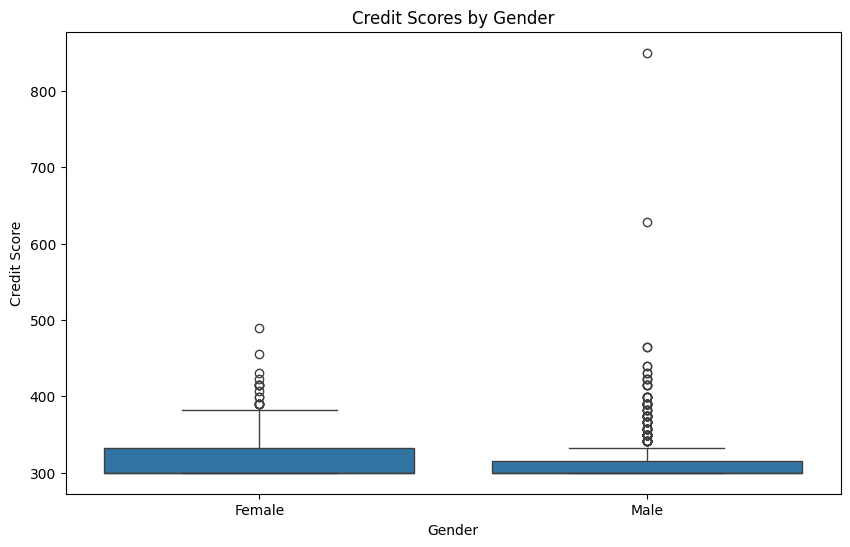

In [132]:
# A boxplot of CreditScore by Gender
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Gender', y='CreditScore', data=cleanData)
boxplot.set_title('Credit Scores by Gender')
boxplot.set_xlabel('Gender')
boxplot.set_ylabel('Credit Score')
boxplot.set_xticklabels(['Female', 'Male'])

plt.show()

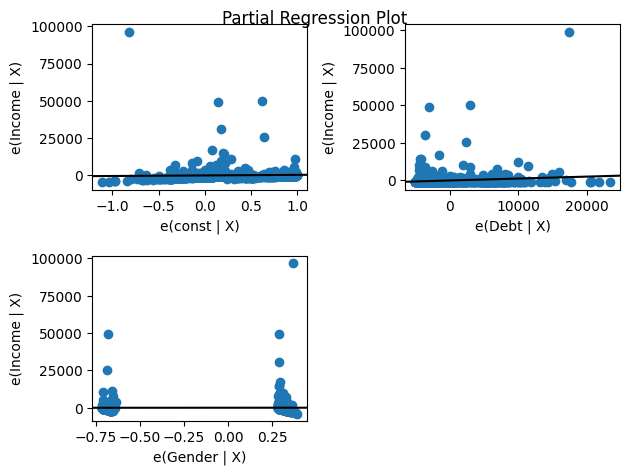

In [133]:
# Income and Debt while controlling for Gender
fig = sm.graphics.plot_partregress_grid(
    sm.OLS(cleanData['Income'], sm.add_constant(cleanData[['Debt', 'Gender']])).fit()
)
plt.show()

In [134]:
# Shapiro-Wilk Test for Income
stat, p = shapiro(non_zero_income)
print('Statistics = %.3f, p = %.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics = 0.234, p = 0.000
Sample does not look Gaussian (reject H0)


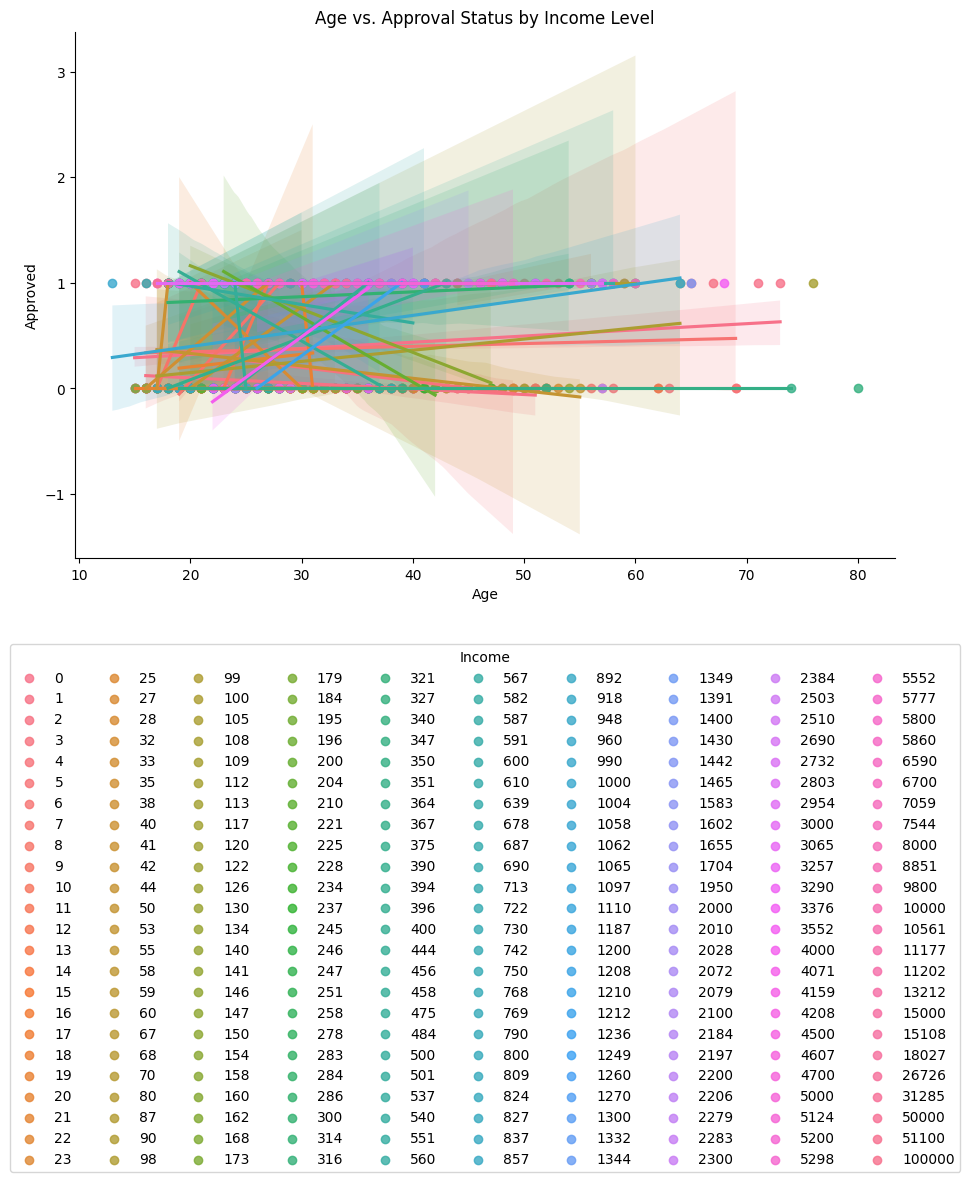

In [135]:
# Interaction term between 'Age' and 'Income'
lm = sns.lmplot(x='Age', y='Approved', data=cleanData, hue='Income', height=6, aspect=1.5, legend=False)
plt.title('Age vs. Approval Status by Income Level')
ax = plt.gca()
fig = plt.gcf()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=10, title='Income')

plt.show()

# How our Important Variables Affect Our Response

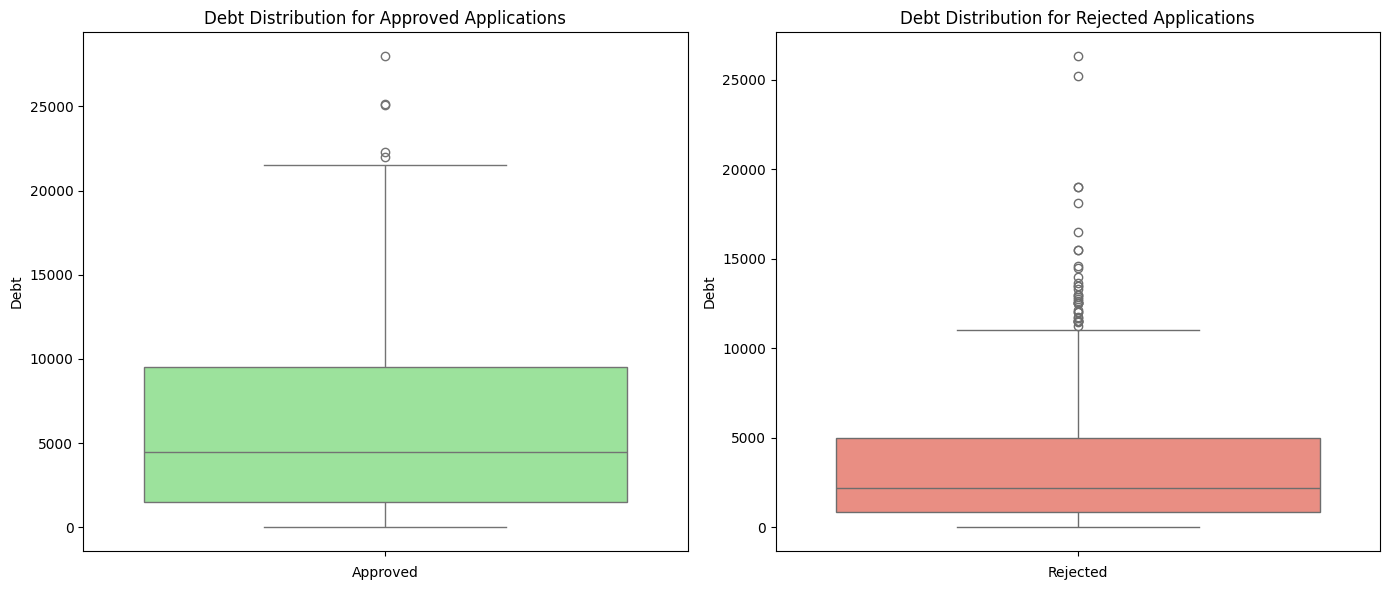

In [136]:
# Debt by Approval Status
approved_data = cleanData[cleanData['Approved'] == 1]
rejected_data = cleanData[cleanData['Approved'] == 0]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Approvals
sns.boxplot(y=approved_data['Debt'], ax=axes[0], color='lightgreen')
axes[0].set_title('Debt Distribution for Approved Applications')
axes[0].set_ylabel('Debt')
axes[0].set_xlabel('Approved')

# Rejections
sns.boxplot(y=rejected_data['Debt'], ax=axes[1], color='salmon')
axes[1].set_title('Debt Distribution for Rejected Applications')
axes[1].set_ylabel('Debt')
axes[1].set_xlabel('Rejected')

plt.tight_layout()
plt.show()

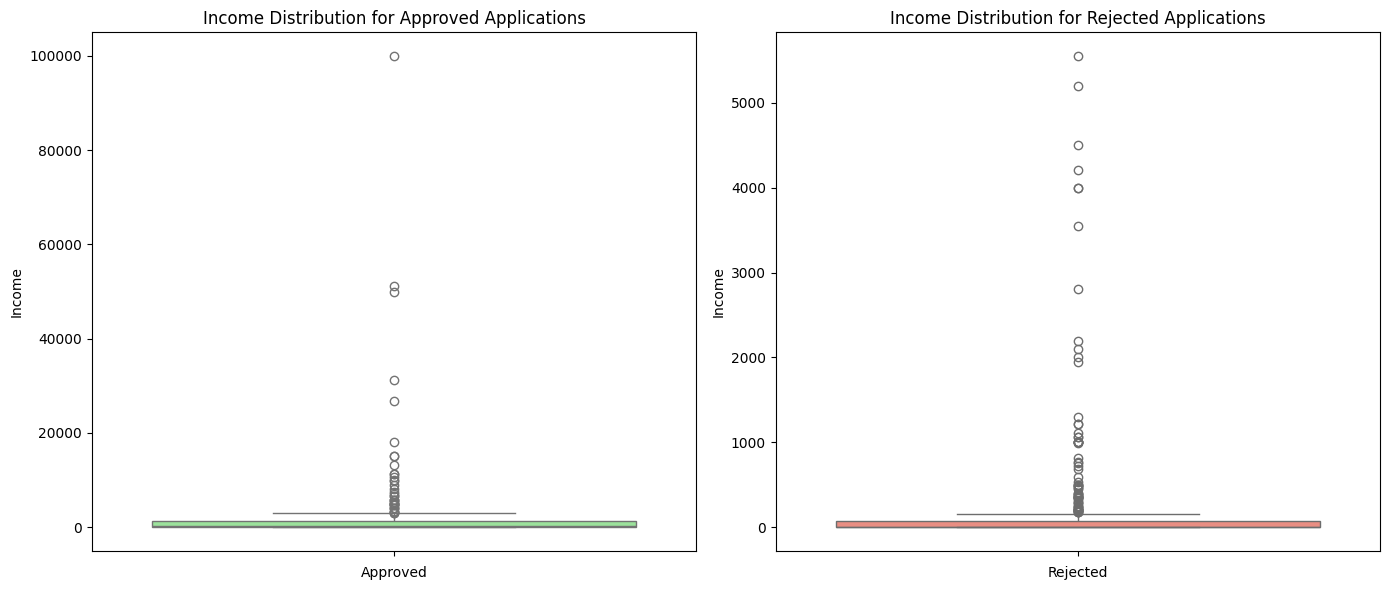

In [137]:
# Income by Approval Status
approved_data = cleanData[cleanData['Approved'] == 1]
rejected_data = cleanData[cleanData['Approved'] == 0]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Approvals
sns.boxplot(y=approved_data['Income'], ax=axes[0], color='lightgreen')
axes[0].set_title('Income Distribution for Approved Applications')
axes[0].set_ylabel('Income')
axes[0].set_xlabel('Approved')

# Rejections
sns.boxplot(y=rejected_data['Income'], ax=axes[1], color='salmon')
axes[1].set_title('Income Distribution for Rejected Applications')
axes[1].set_ylabel('Income')
axes[1].set_xlabel('Rejected')

plt.tight_layout()
plt.show()

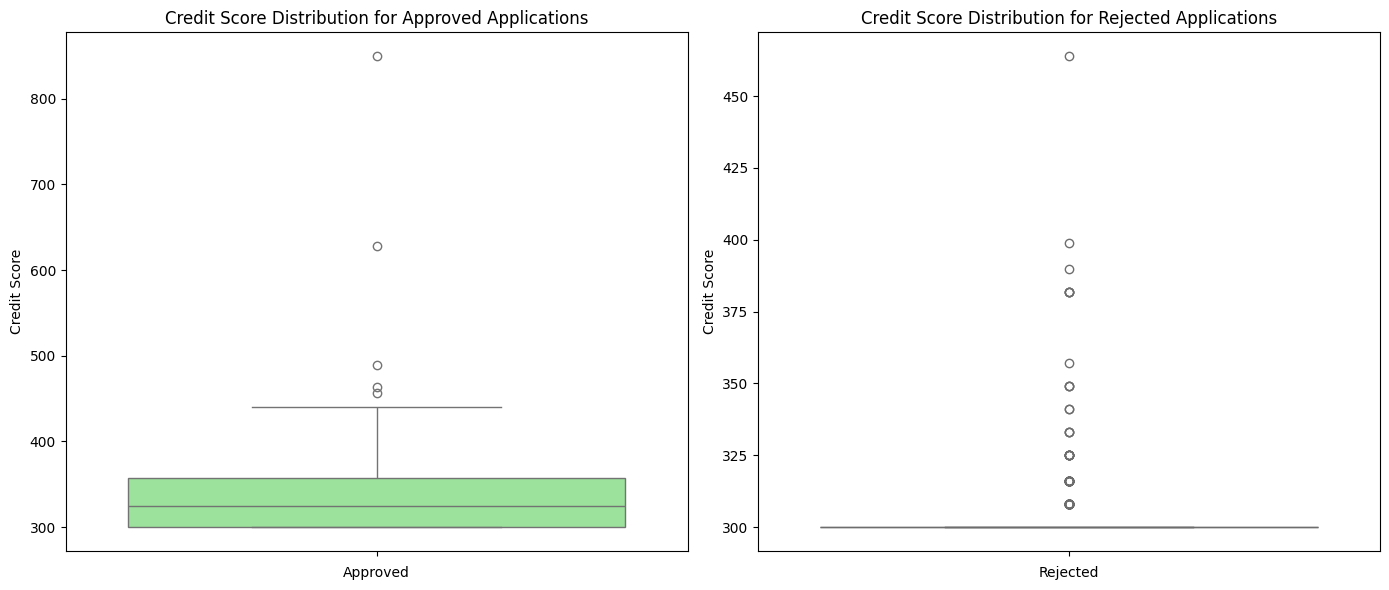

In [138]:
# Credit Score by Approval Status
approved_data = cleanData[cleanData['Approved'] == 1]
rejected_data = cleanData[cleanData['Approved'] == 0]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Approvals
sns.boxplot(y=approved_data['CreditScore'], ax=axes[0], color='lightgreen')
axes[0].set_title('Credit Score Distribution for Approved Applications')
axes[0].set_ylabel('Credit Score')
axes[0].set_xlabel('Approved')

# Rejections
sns.boxplot(y=rejected_data['CreditScore'], ax=axes[1], color='salmon')
axes[1].set_title('Credit Score Distribution for Rejected Applications')
axes[1].set_ylabel('Credit Score')
axes[1].set_xlabel('Rejected')

plt.tight_layout()
plt.show()

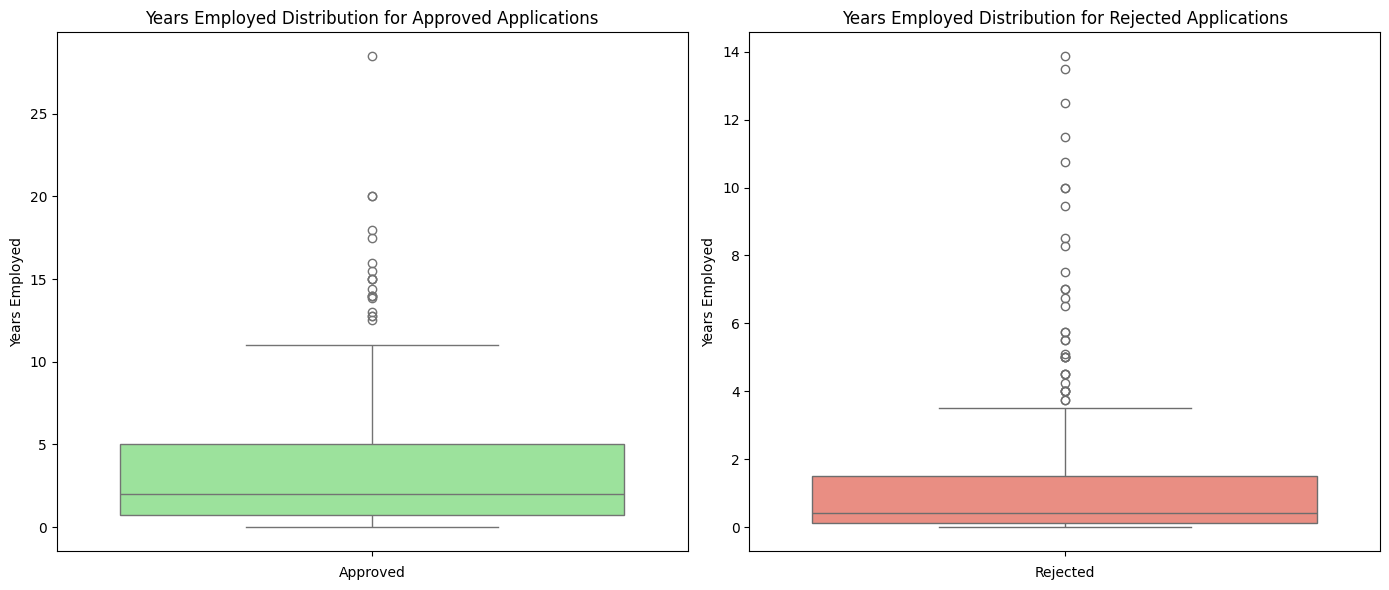

In [139]:
# Years Employed by Approval Status
approved_data = cleanData[cleanData['Approved'] == 1]
rejected_data = cleanData[cleanData['Approved'] == 0]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Approvals
sns.boxplot(y=approved_data['YearsEmployed'], ax=axes[0], color='lightgreen')
axes[0].set_title('Years Employed Distribution for Approved Applications')
axes[0].set_ylabel('Years Employed')
axes[0].set_xlabel('Approved')

# Rejections
sns.boxplot(y=rejected_data['YearsEmployed'], ax=axes[1], color='salmon')
axes[1].set_title('Years Employed Distribution for Rejected Applications')
axes[1].set_ylabel('Years Employed')
axes[1].set_xlabel('Rejected')

plt.tight_layout()
plt.show()

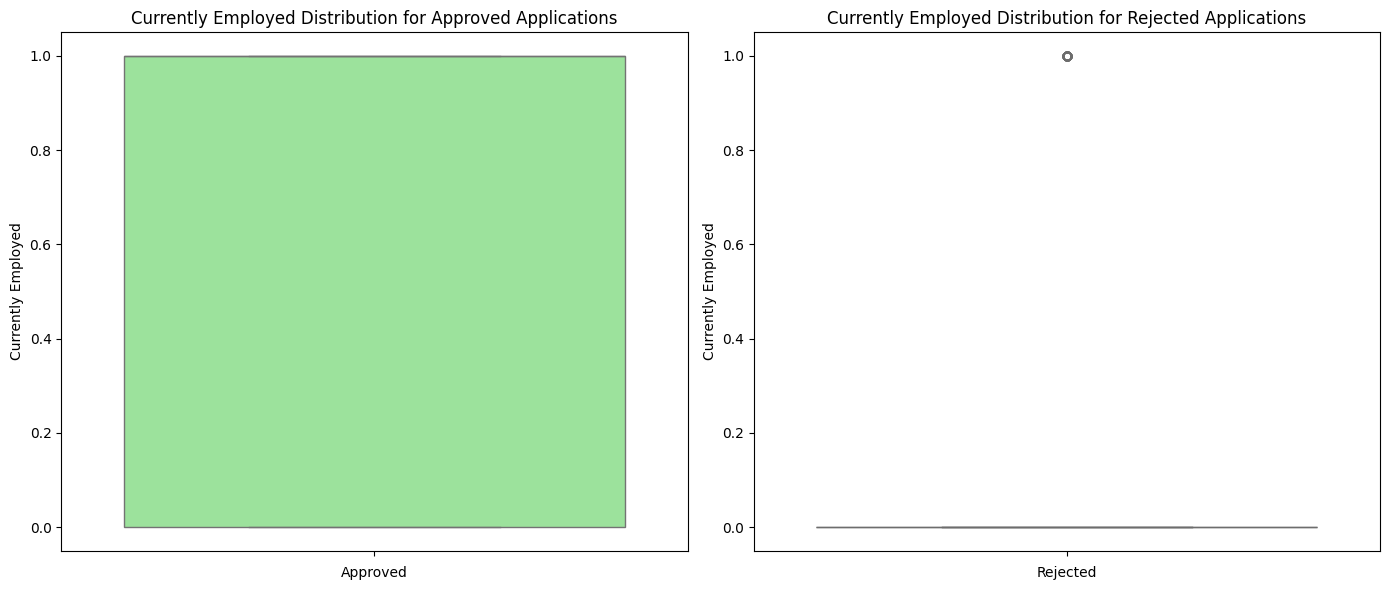

In [140]:
# Currently Employed by Approval Status
approved_data = cleanData[cleanData['Approved'] == 1]
rejected_data = cleanData[cleanData['Approved'] == 0]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Approvals
sns.boxplot(y=approved_data['Employed'], ax=axes[0], color='lightgreen')
axes[0].set_title('Currently Employed Distribution for Approved Applications')
axes[0].set_ylabel('Currently Employed')
axes[0].set_xlabel('Approved')

# Rejections
sns.boxplot(y=rejected_data['Employed'], ax=axes[1], color='salmon')
axes[1].set_title('Currently Employed Distribution for Rejected Applications')
axes[1].set_ylabel('Currently Employed')
axes[1].set_xlabel('Rejected')

plt.tight_layout()
plt.show()

# Logistical Regression

In [141]:
# Select the variables of interest
features = cleanData[['Income', 'Debt', 'CreditScore', 'YearsEmployed', 'Employed', 'PriorDefault']]
target = cleanData['Approved']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

categorical_features = ['Employed', 'PriorDefault']
numeric_features = ['Income', 'Debt', 'CreditScore', 'YearsEmployed']

# Create the preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that combines the preprocessor with the estimator
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.76      0.81        68
           1       0.79      0.89      0.84        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138

[[52 16]
 [ 8 62]]


# Classification Report

- Precision: The ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to a low false positive rate. For instance, the precision for class 0 (not approved) is 0.87, meaning that when the model predicts an application is not approved, it's correct 87% of the time.

- Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all observations in the actual class. The recall for class 1 (approved) is 0.89, which means that the model correctly identifies 89% of the approved applications.

- F1-Score: The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. For class 1, the F1-score is 0.84, indicating a good balance between precision and recall.

- Support: Support is the number of actual occurrences of the class in the specified dataset. For our results, there are 68 instances of class 0 and 70 instances of class 1 in the test set.

- Accuracy: Accuracy is the ratio of correctly predicted observations to the total observations. An accuracy of 0.83 means that 83% of all predictions are correct.

- Macro Avg: Macro average precision, recall, and F1-score are arithmetic averages of the respective scores for each class, treating all classes equally.

- Weighted Avg: Weighted average precision, recall, and F1-score calculate the averages of the respective scores for each class, weighted by the number of instances in each class.

- Confusion Matrix:
The confusion matrix is a table used to describe the performance of a classification model. For our binary classifier, the matrix is 2x2 and is structured as follows:

[True Negative  False Positive]

[False Negative True Positive]

- True Negative: The number of correct predictions that an instance is not approved.
- False Positive: The number of incorrect predictions that an instance is approved.
- False Negative: The number of incorrect predictions where an instance not approved.
- True Positive: The number of correct predictions that an instance is approved.

52 instances were correctly predicted as not approved.
16 instances were incorrectly predicted as approved.
8 instances were incorrectly predicted as not approved.
62 instances were correctly predicted as approved.

Overall, the model performs quite well with an overall accuracy of 83%, good balance in precision and recall, and a relatively high F1 score. However, we may still want to look into the false positives and false negatives to understand where the model might be making mistakes and see if there's room for improvement, possibly through feature engineering, rebalancing the dataset, or tuning model hyperparameters.

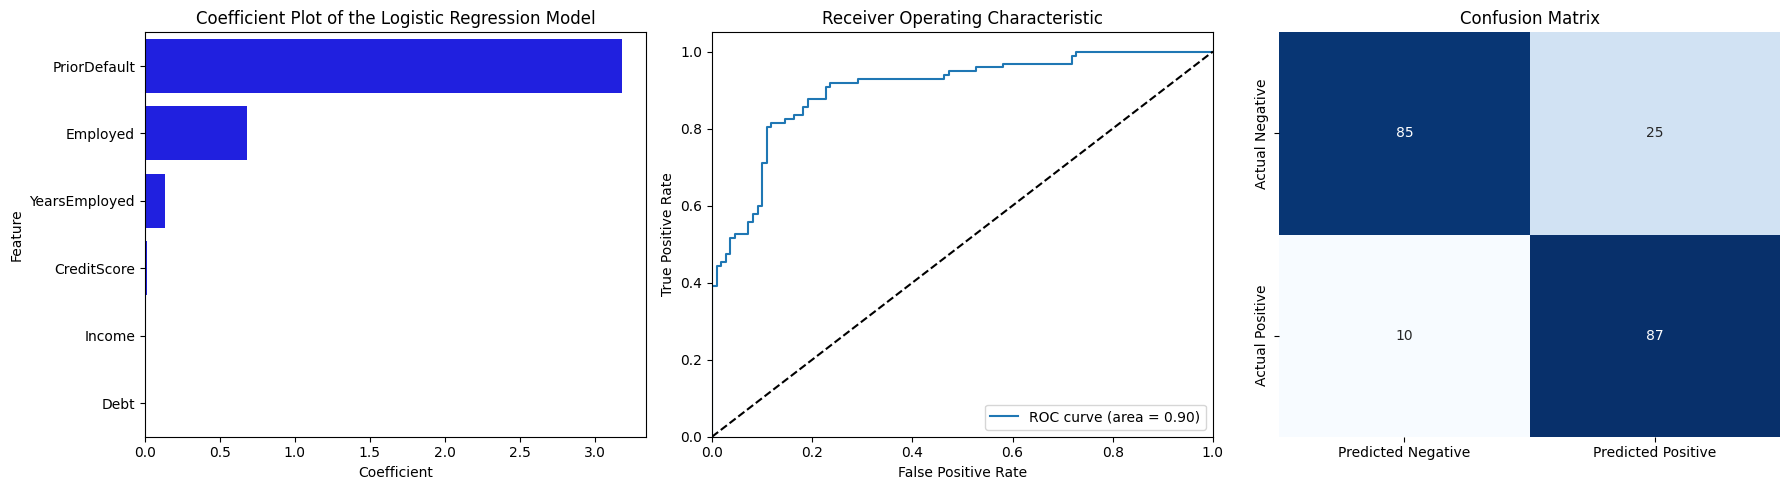

In [142]:

# Define the features and the target variable
X = cleanData[['Income', 'Debt', 'CreditScore', 'YearsEmployed', 'Employed', 'PriorDefault']]
y = cleanData['Approved']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plotting
plt.figure(figsize=(18, 5))

# Coefficient Plot
plt.subplot(131)
sns.barplot(x='Coefficient', y='Feature', data=coefficients, color='b')
plt.title('Coefficient Plot of the Logistic Regression Model')

# ROC Curve Plot
plt.subplot(132)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Confusion Matrix Visualization
plt.subplot(133)
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

# Feature Importance

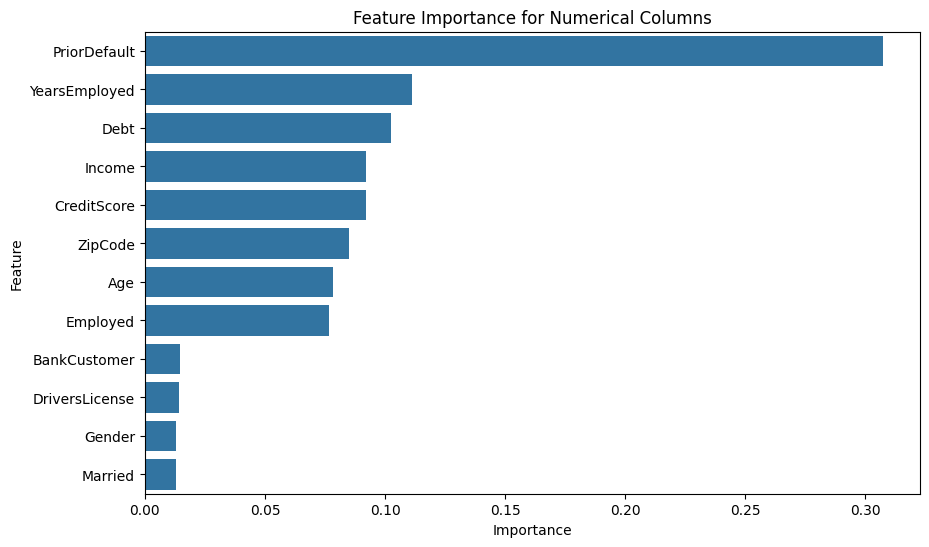

In [143]:
# Select only numerical columns
X_numerical = cleanData.select_dtypes(include=['int64', 'float64'])
y = cleanData['Approved']

# If 'Approved' got selected with numerical columns, drop it from features
if 'Approved' in X_numerical:
    X_numerical = X_numerical.drop('Approved', axis=1)

# Fit the Random Forest model on numerical data
rf = RandomForestClassifier()
rf.fit(X_numerical, y)

# Get feature importances
importances = rf.feature_importances_

# Convert to a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_numerical.columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Numerical Columns')
plt.show()


# Partial Dependency

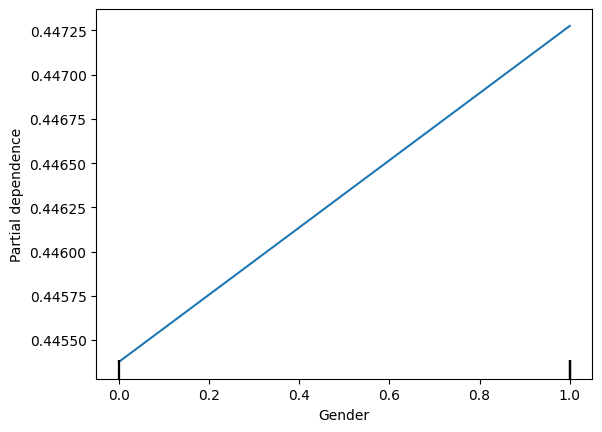

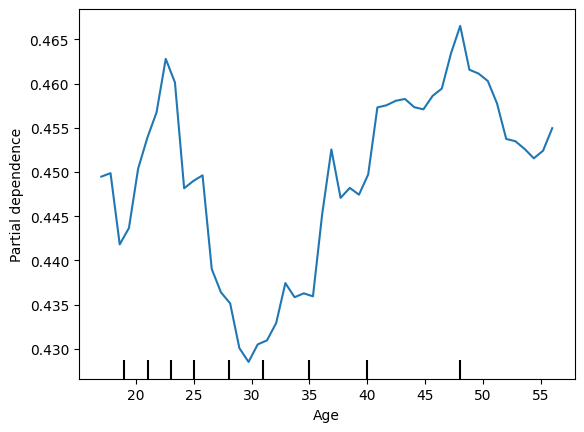

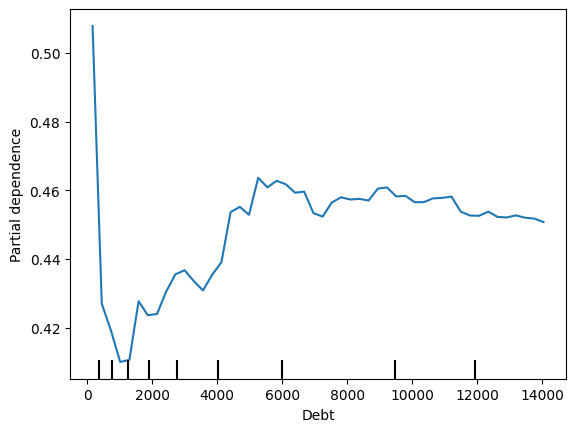

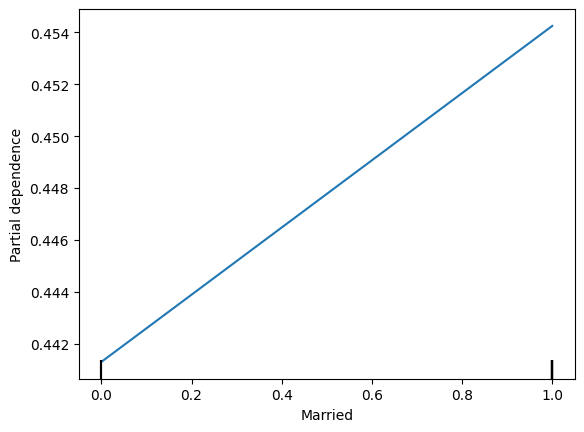

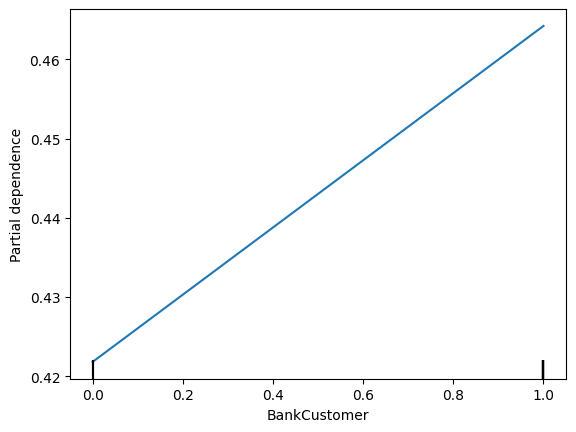

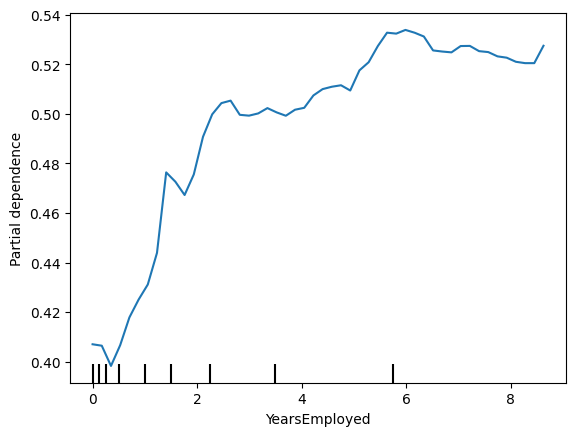

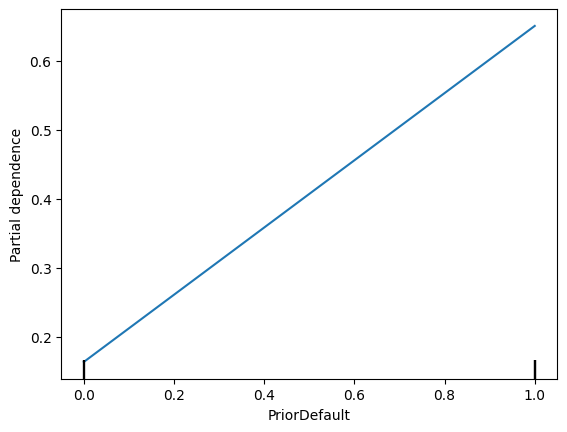

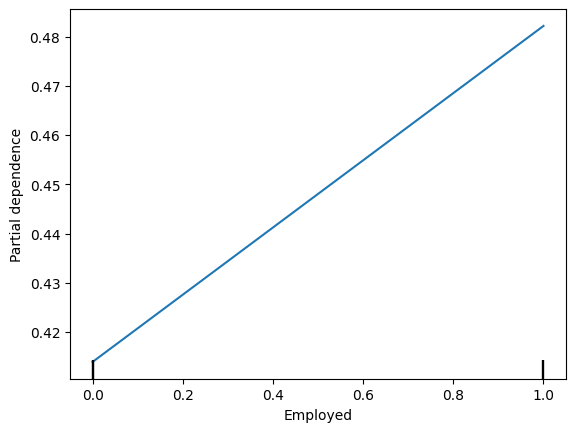

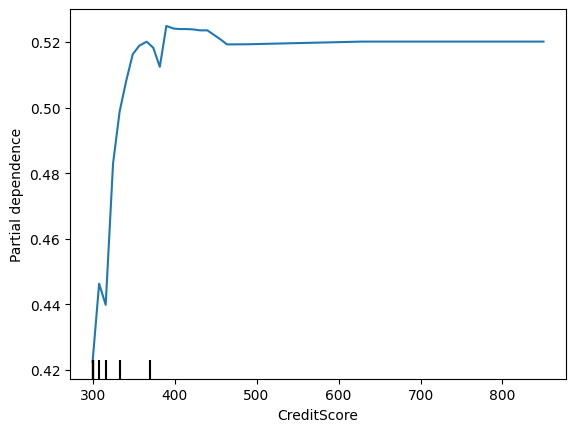

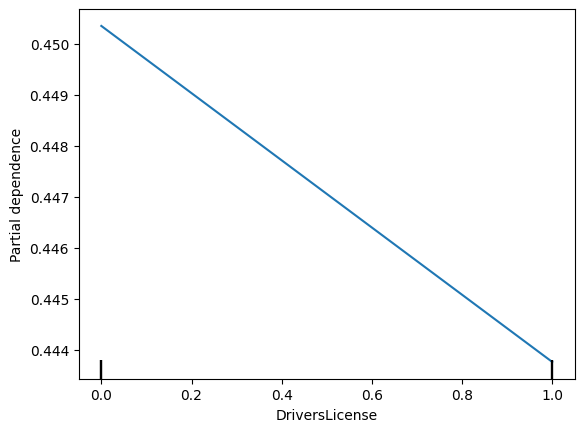

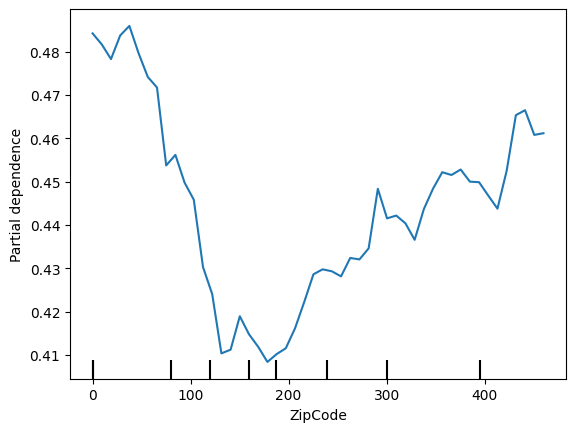

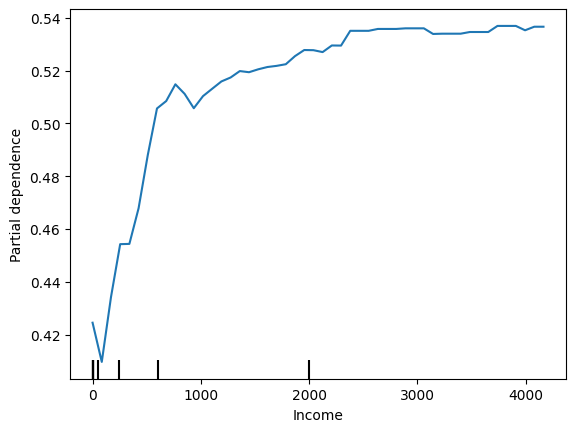

In [144]:
# Separate out numeric columns
numeric_data = cleanData.select_dtypes(include=[np.number])

X = numeric_data.drop('Approved', axis=1)
y = numeric_data['Approved']

# Fit the Random Forest model
model = RandomForestClassifier(random_state=0)
model.fit(X, y)

# Plot Partial Dependence Plots for all numerical features
for feature in X.columns:
    PartialDependenceDisplay.from_estimator(model, X, features=[feature], kind='average', grid_resolution=50)
    plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


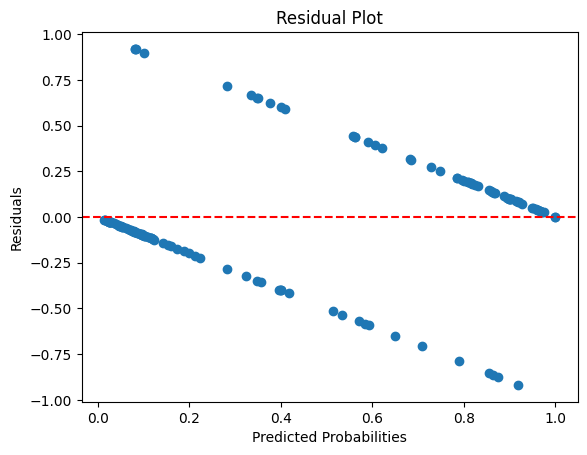

In [145]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

numerical_cols = cleanData.select_dtypes(include=['number']).columns
X = cleanData[numerical_cols].drop('Approved', axis=1)
y = cleanData['Approved']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the probabilities on the test set
y_probs = model.predict_proba(X_test)[:, 1] # Get the probability of the positive class

# Calculate the residuals
residuals = y_test - y_probs

# Plot the residuals
plt.scatter(y_probs, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# New Logistical Regression

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Selecting only the specified columns
selected_columns = ['Income', 'Debt', 'CreditScore', 'YearsEmployed', 'Employed', 'PriorDefault', 'Approved']
df_selected = cleanData[selected_columns]

# 'Approved' is the target variable
X = df_selected.drop('Approved', axis=1)
y = df_selected['Approved']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline that scales the data then creates a logistic regression model
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.77      0.83       110
           1       0.78      0.91      0.84        97

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.85      0.84      0.84       207

[[85 25]
 [ 9 88]]


/var/folders/wf/szdy9b493w9fmdg8p85hqfrc0000gn/T/ipykernel_60957/3573588904.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')


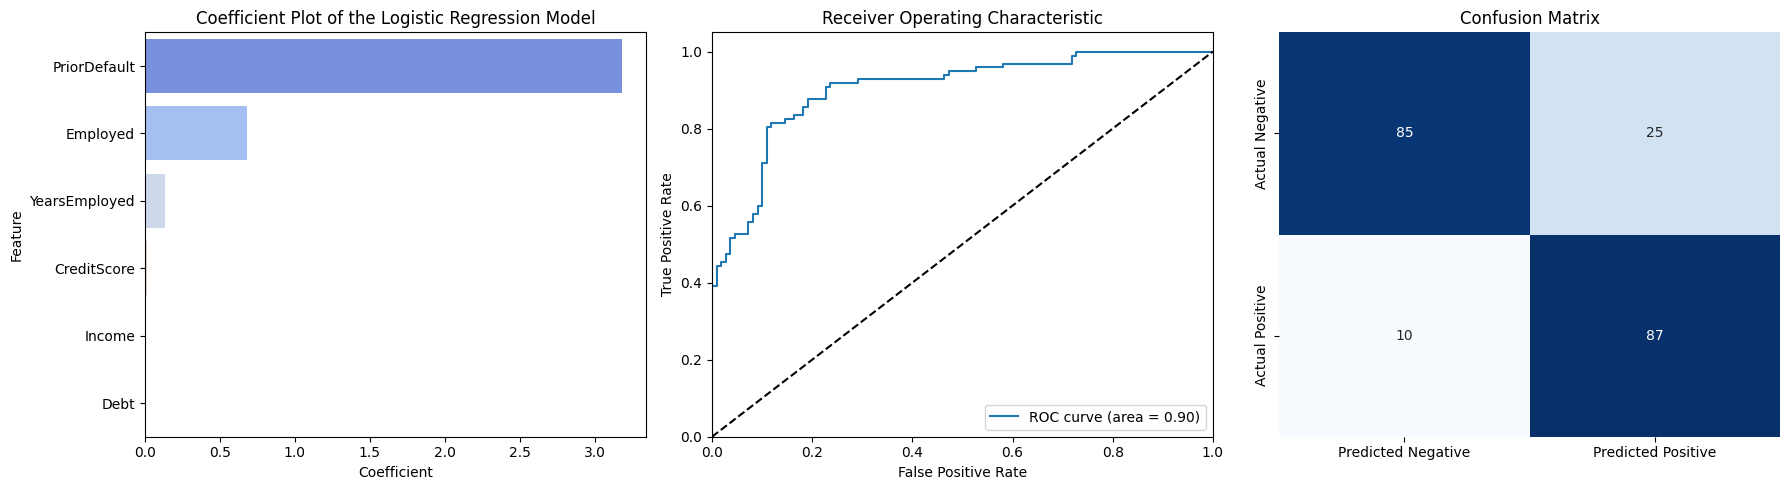

In [147]:
# Selecting only the specified columns
selected_columns = ['Income', 'Debt', 'CreditScore', 'YearsEmployed', 'Employed', 'PriorDefault', 'Approved']
df_selected = cleanData[selected_columns]

# 'Approved' is the target variable
X = df_selected.drop('Approved', axis=1)
y = df_selected['Approved']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
log_reg = LogisticRegression(max_iter=10000)  # Increase the number of iterations to ensure convergence
log_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plotting
plt.figure(figsize=(18, 5))

# Coefficient Plot
plt.subplot(131)
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title('Coefficient Plot of the Logistic Regression Model')

# ROC Curve Plot
plt.subplot(132)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Confusion Matrix Visualization
plt.subplot(133)
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()


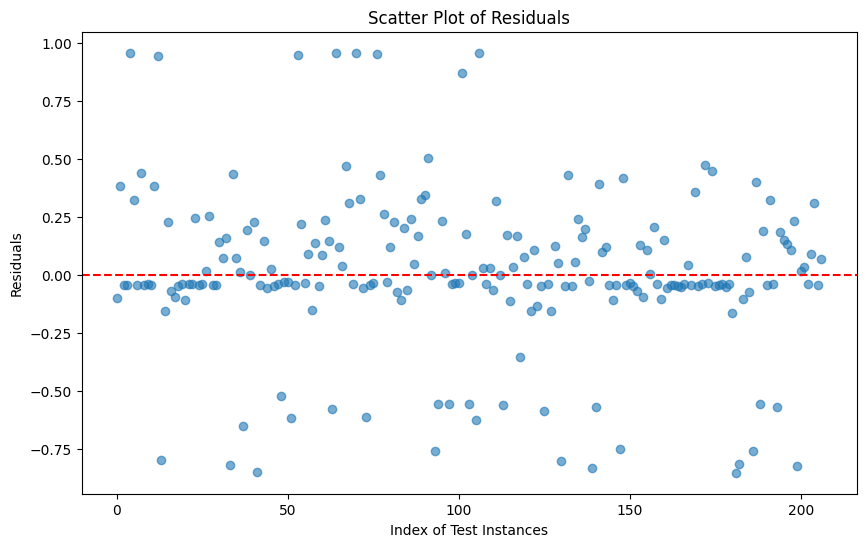

Durbin-Watson statistic: 2.024385023306649


In [148]:
# Predict probabilities on the test set (using the pipeline)
y_probs = pipeline.predict_proba(X_test)[:, 1]

# Calculate residuals as the difference between the actual labels and predicted probabilities
residuals = y_test - y_probs

plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.6)
plt.title('Scatter Plot of Residuals')
plt.xlabel('Index of Test Instances')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Durbin-Watson statistic to quantify the presence of autocorrelation in residuals
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")


# Model Diagnostics

In [149]:
from sklearn.metrics import accuracy_score, log_loss

# Predictions
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

# Performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, y_prob))


Training Accuracy: 0.8674948240165632
Test Accuracy: 0.8309178743961353
Log Loss: 0.3873871035461686


In [150]:
import statsmodels.api as sm

# Adding constant for intercept term
X_train_with_const = sm.add_constant(X_train)

# Fitting model
logit_model = sm.Logit(y_train, X_train_with_const).fit()
print(logit_model.summary())

# Log-Likelihood
log_likelihood = logit_model.llf

# Number of parameters
num_params = len(logit_model.params)

# Number of observations
num_obs = len(X_train)

# AIC and BIC calculation
AIC = 2 * num_params - 2 * log_likelihood
BIC = num_params * np.log(num_obs) - 2 * log_likelihood

print(logit_model.summary())
print(f"AIC: {AIC}")
print(f"BIC: {BIC}")


Optimization terminated successfully.
         Current function value: 0.320686
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Approved   No. Observations:                  483
Model:                          Logit   Df Residuals:                      476
Method:                           MLE   Df Model:                            6
Date:                Tue, 30 Apr 2024   Pseudo R-squ.:                  0.5316
Time:                        07:42:50   Log-Likelihood:                -154.89
converged:                       True   LL-Null:                       -330.67
Covariance Type:            nonrobust   LLR p-value:                 7.150e-73
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.8250      2.083     -2.797      0.005      -9.907      -1.743
Income            0.

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
print(vif_data)


         feature       VIF
0         Income  1.075262
1           Debt  2.186425
2    CreditScore  3.343962
3  YearsEmployed  1.709524
4       Employed  2.340679
5   PriorDefault  2.843085


# Likelihood Ratio Test

In [174]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit

df_selected = pd.read_csv('clean_dataset.csv')

full_formula = 'Approved ~ Married + BankCustomer + DriversLicense + Income + Debt + CreditScore + YearsEmployed + Employed + PriorDefault'
reduced_formula = 'Approved ~ Income + Debt + CreditScore + YearsEmployed + Employed + PriorDefault'

# Fit the full model
full_model = logit(formula=full_formula, data=df_selected).fit(disp=0)

# Fit the reduced model
reduced_model = logit(formula=reduced_formula, data=df_selected).fit(disp=0)

# Calculate the test statistic for the likelihood ratio test
D = 2 * (full_model.llf - reduced_model.llf)

# Degrees of freedom is the difference in number of parameters between the models
df = len(full_model.params) - len(reduced_model.params)

# Compute the p-value from the chi-squared distribution
from scipy.stats import chi2
p_value = chi2.sf(D, df)

print(f"Likelihood Ratio Test Statistic: {D}")
print(f"p-value: {p_value}")


Likelihood Ratio Test Statistic: 13.408728881835998
p-value: 0.0038311350414629904


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


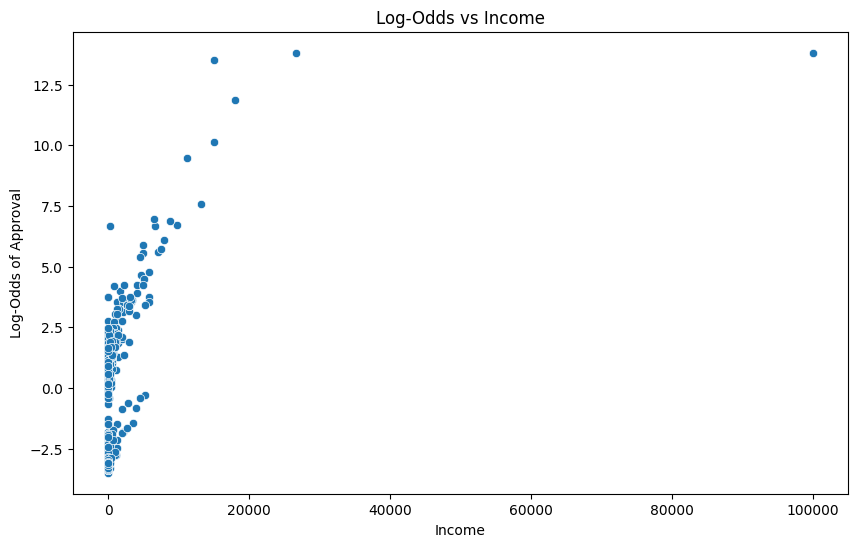

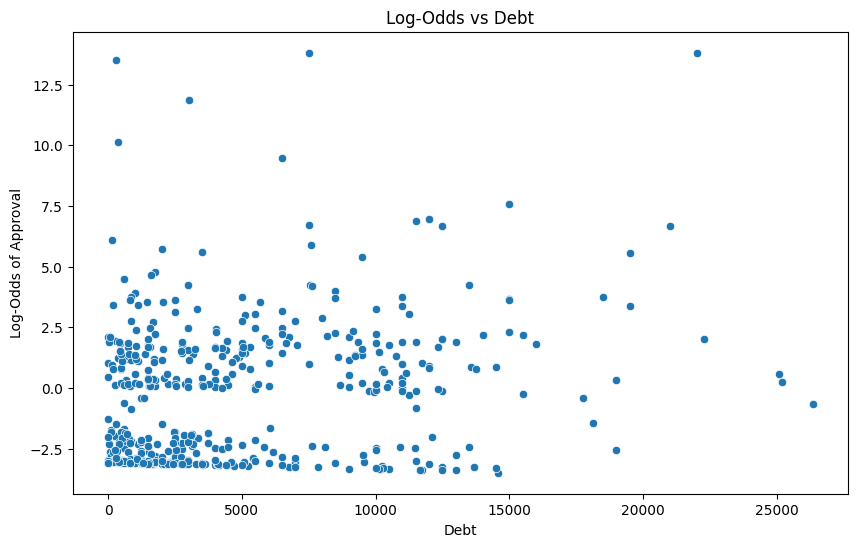

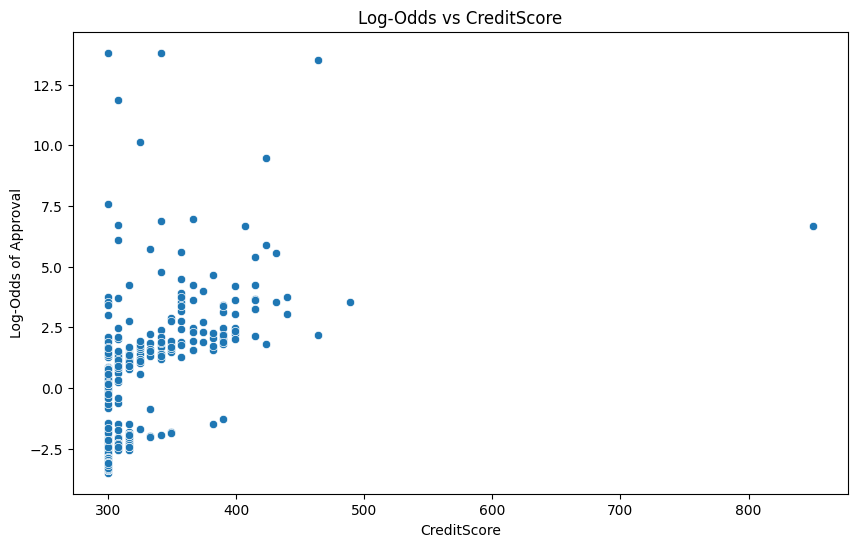

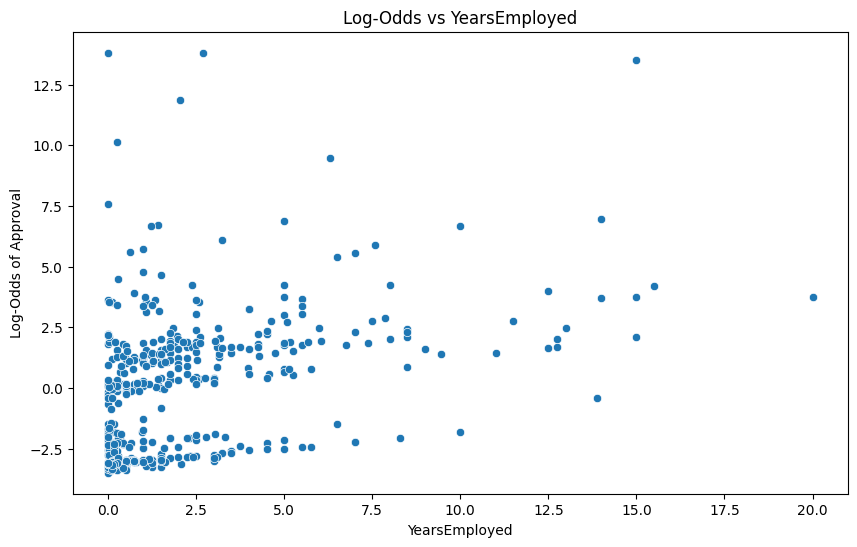

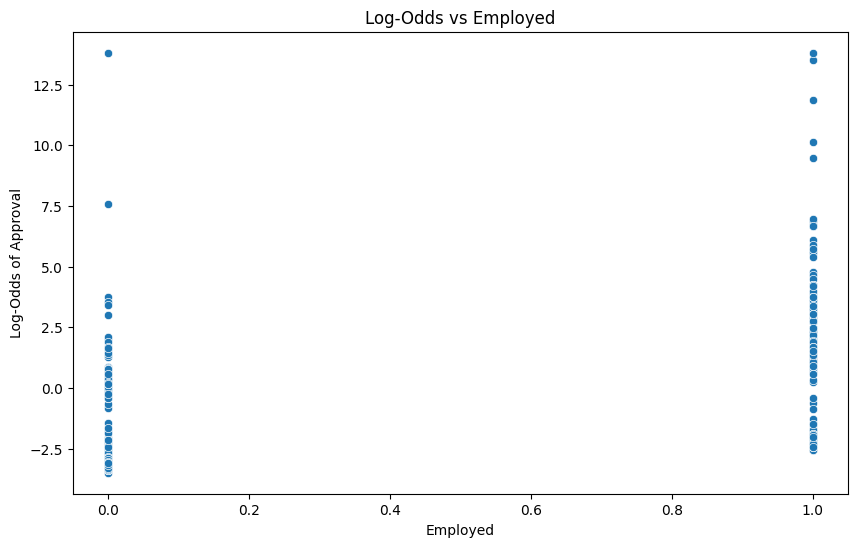

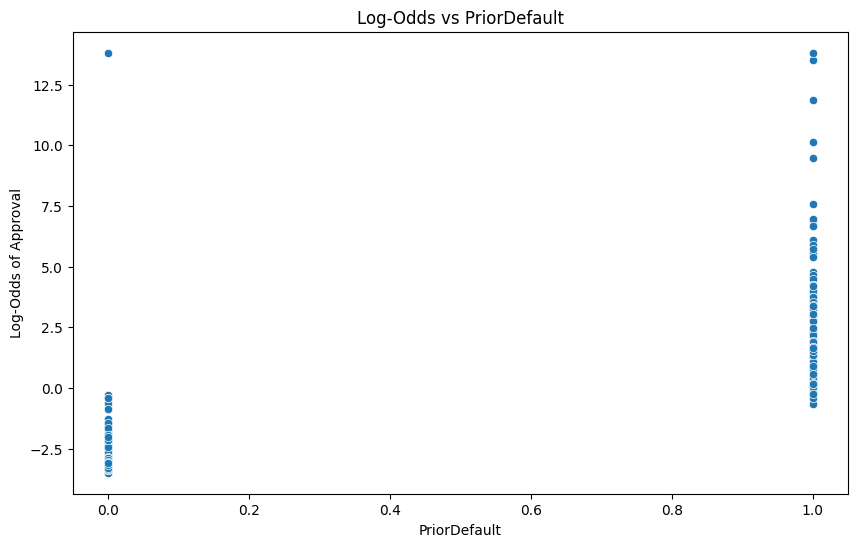

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

selected_columns = ['Income', 'Debt', 'CreditScore', 'YearsEmployed', 'Employed', 'PriorDefault', 'Approved']
df_selected = cleanData[selected_columns]

# Separating features and target
X = df_selected.drop('Approved', axis=1)
y = df_selected['Approved']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Getting the predicted probabilities
pred_probs = model.predict_proba(X_train)[:, 1]

epsilon = 1e-6
pred_probs_adj = np.clip(pred_probs, epsilon, 1 - epsilon)

# Now calculate the log odds
log_odds = np.log(pred_probs_adj / (1 - pred_probs_adj))

# Plotting the relationship
for column in X_train.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=X_train[column], y=log_odds)
    plt.title(f'Log-Odds vs {column}')
    plt.xlabel(column)
    plt.ylabel('Log-Odds of Approval')
    plt.show()

# Cook's Distance

Optimization terminated successfully.
         Current function value: 0.320697
         Iterations 8
Cook's Distance: [3.49453210e-04 4.61340231e-05 7.22147330e-03 2.51836509e-02
 2.04803458e-04 5.77127786e-06 1.70711546e-03 1.52056297e-05
 1.86831244e-04 3.11381476e-03 1.76014652e-05 2.07069027e-04
 2.01480774e-05 2.63058884e-03 1.78522040e-03 8.07069029e-04
 2.39268615e-05 3.91641609e-07 2.08457188e-05 2.12747924e-05
 3.05891567e-05 1.00954119e-04 2.21197958e-04 2.08383598e-05
 2.20476015e-05 1.27157456e-04 1.86340363e-05 6.03993391e-04
 6.51651329e-04 6.86578707e-05 8.20912282e-04 1.04423619e-04
 1.92929493e-05 2.64021317e-05 1.56002702e-03 3.58859226e-03
 3.02398907e-05 2.03456345e-05 7.10415713e-06 1.79700717e-05
 1.25581115e-03 3.28377740e-04 1.12131803e-04 3.38589149e-03
 2.38498505e-05 2.50767354e-02 2.34673599e-05 1.11231537e-04
 2.54778929e-04 2.21128162e-05 3.01277283e-05 1.63822835e-03
 2.09632163e-05 6.72292648e-05 8.18354427e-03 3.55879330e-05
 5.12693319e-05 3.55697250e

/opt/homebrew/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:5312: RuntimeWarning: invalid value encountered in divide
  return (endog - M*p)/np.sqrt(M*p*(1-p))


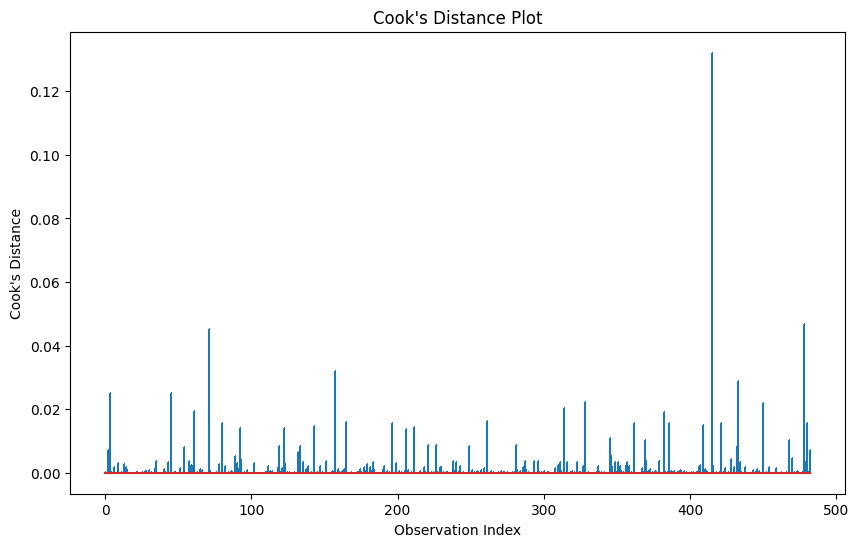

In [154]:
# Read the data
df = pd.read_csv("clean_dataset.csv")
selected_columns = ['Income', 'Debt', 'CreditScore', 'YearsEmployed', 'Employed', 'PriorDefault', 'Approved']
df_selected = df[selected_columns]

# Separating the predictors and response
X = df_selected.drop('Approved', axis=1)
y = df_selected['Approved']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adding a constant to the model
X_train_const = sm.add_constant(X_train)

# Fitting the logistic regression model
model = sm.Logit(y_train, X_train_const)
result = model.fit()

# Cook's Distance
influence = result.get_influence()
cooks = influence.cooks_distance
print('Cook\'s Distance:', cooks[0])
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks[0])), cooks[0], markerfmt=",")
plt.title('Cook\'s Distance Plot')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.show()
